In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

In [11]:
data = pd.read_csv('data\Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Simple Linear Regression

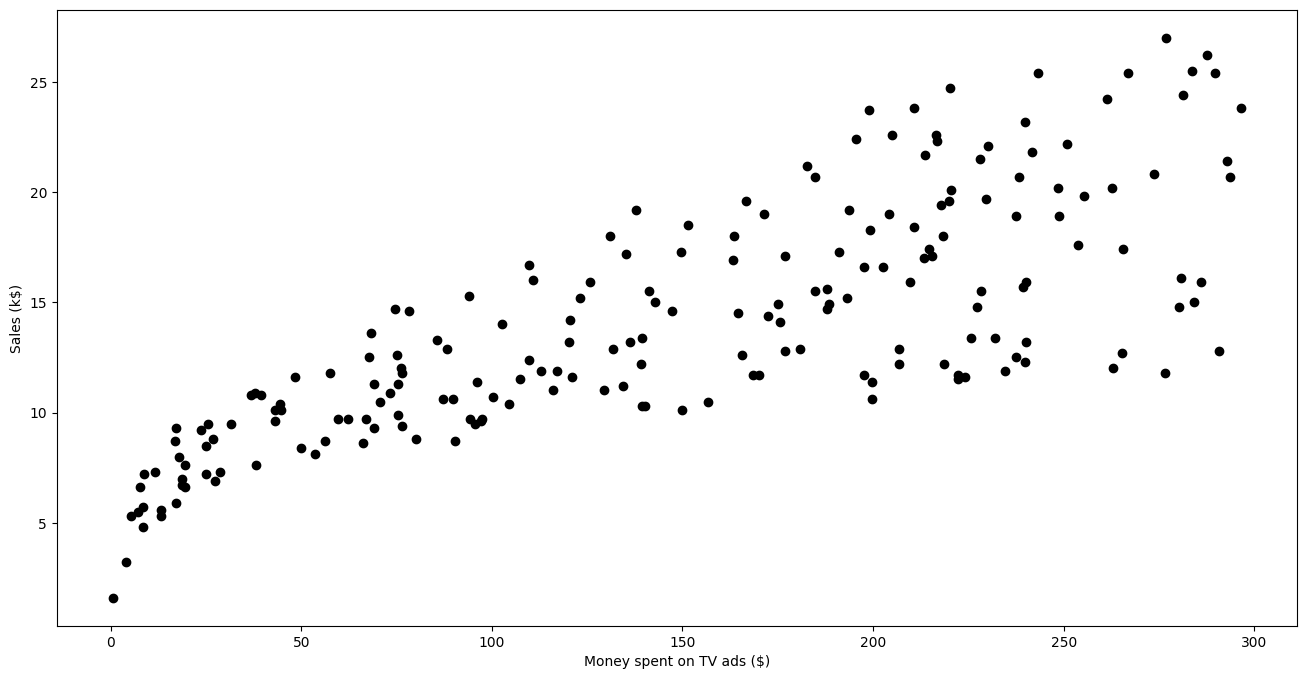

In [12]:
## Ploting data
plt.figure(figsize=(16,8))
plt.scatter(data['TV'], data['sales'], c='black')
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

In [13]:
X = data['TV'].values.reshape(-1, 1) ## specify feature
y = data['sales'].values.reshape(-1, 1) ## specify the target

reg = LinearRegression() ## call regression models
reg.fit(X, y) ## fit the data 

print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

The linear model is: 
 Y = 7.032593549127695 + 0.04753664043301975*TV


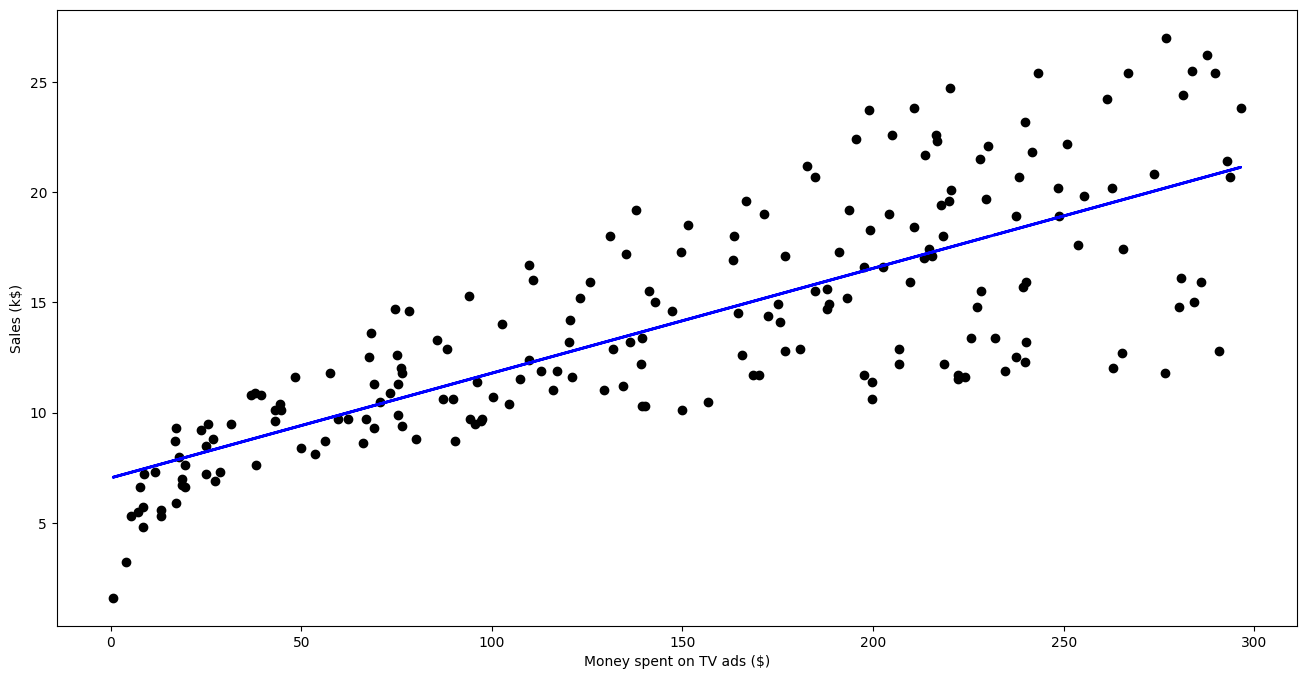

In [14]:
predictions = reg.predict(X) ## call the predict method

plt.figure(figsize=(16,8))
plt.scatter(X, y, c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

In [15]:
## acessing the quality of the model

X = data['TV']
y = data['sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit() ## Ordinary Least Squares

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           1.47e-42
Time:                        13:48:11   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [16]:
## Mutiple Linear Regression 

In [17]:
Xs = data.drop(['sales'], axis=1)
## is dropping the 'sales' column
## The axis=1 argument specifies that you want to drop a column 
## (as opposed to a row, where axis=0 would be used). 
## So, Xs will contain all columns from data except 'sales'.

y = data['sales'].values.reshape(-1, 1)
## is extracting the 'sales' column from the original data 
## and reshaping it into a 2D NumPy array with a single column
## -1 in the reshape method means that you want NumPy to infer 
## the size of one dimension while keeping the other dimension as 1

reg = LinearRegression()
reg.fit(Xs, y)

print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper")
## coeficients in the same order as the dataset

The linear model is: 
 Y = 2.938889369459412 + 0.0457646454553976*TV + 0.18853001691820445*radio + -0.0010374930424763285*newspaper


In [18]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales'].values.reshape(-1,1)

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           1.58e-96
Time:                        13:48:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [19]:
## The p value for the newspaper is above 0.5 
## which means its not relevant for our model, so we should take it out

## Interpreting the residual plot:

If the points are randomly scattered around the red dashed line, it indicates that the residuals have no pattern and the model's predictions are unbiased.
If there's a specific pattern (e.g., curvature or funnel shape), it might suggest that the model is not capturing certain relationships or is affected by some underlying factor.
If there are outliers (residuals far away from the line), they might indicate unusual data points or potential errors in the model.

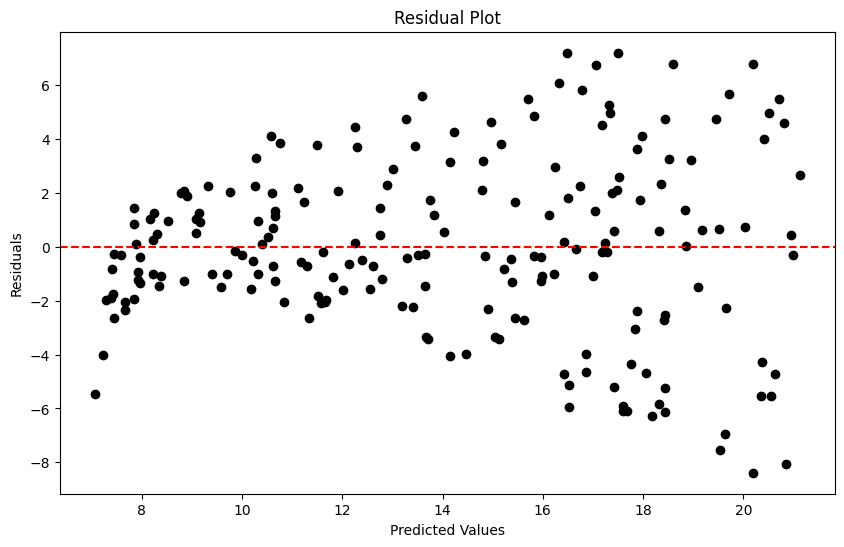

In [20]:

# Assuming you have already performed your regression analysis and obtained predictions
# X and y are your independent and dependent variables, respectively

# Calculate the residuals
residuals = y - predictions

# Plot the residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, c='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()